In [ ]:
#Full Precision Alexnet on Cats and Dogs dataset

In [1]:
import keras

import matplotlib.pyplot as plt

from keras import backend as K

from keras.models import Sequential

from keras.layers import Dense, Conv2D, Flatten, MaxPool2D

from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

from keras.utils import to_categorical
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

import numpy as np

#loading and preprocessing data from dataset
#please change path as per dataset in your system

trdata = ImageDataGenerator()

traindata = trdata.flow_from_directory(directory="C:/Users/Manas/Downloads/cat-and-dog/training_set/training_set",target_size=(227,227))
trdata = ImageDataGenerator()

testdata = trdata.flow_from_directory(directory="C:/Users/Manas/Downloads/cat-and-dog/test_set/test_set",target_size=(227,227))

#defining and creating the model as per architecture
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(227,227,3), kernel_size=(11,11), strides=(4,4), padding="valid", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding="same", activation = "relu"))

# Max Pooling
model.add(MaxPool2D(pool_size=(3,3), strides=(2,2), padding="valid"))

# Passing it to a Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(units = 9216, activation = "relu"))

# 2nd Fully Connected Layer
model.add(Dense(units = 4096, activation = "relu"))

# 3rd Fully Connected Layer
model.add(Dense(4096, activation = "relu"))

# Output Layer
model.add(Dense(2, activation = "softmax")) #As we have two classes

Using TensorFlow backend.


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.



In [2]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 256)      

In [5]:
#defining Earlystopping callback and saving the best model for future use
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("alexnet_fp_32bit.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)

early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [6]:
#training and validating train and validation data respectively

hist = model.fit_generator(steps_per_epoch=2,generator=traindata, validation_data= testdata, 
                           validation_steps=10,epochs=30,callbacks=[checkpoint,early])


Epoch 1/30
2/2 [==============================] - 33s 17s/step - loss: 26476.4557 - accuracy: 0.4375 - val_loss: 13.5991 - val_accuracy: 0.5188


C:\Users\Manas\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)
C:\Users\Manas\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


Epoch 2/30
2/2 [==============================] - 55s 27s/step - loss: 9.4681 - accuracy: 0.4375 - val_loss: 2.6396 - val_accuracy: 0.4688
Epoch 3/30
2/2 [==============================] - 59s 29s/step - loss: 4.6928 - accuracy: 0.4844 - val_loss: 0.6792 - val_accuracy: 0.5125
Epoch 4/30
2/2 [==============================] - 37s 18s/step - loss: 1.2246 - accuracy: 0.6094 - val_loss: 0.8569 - val_accuracy: 0.4938
Epoch 5/30
2/2 [==============================] - 67s 33s/step - loss: 0.8750 - accuracy: 0.4375 - val_loss: 0.6738 - val_accuracy: 0.4938
Epoch 6/30
2/2 [==============================] - 91s 46s/step - loss: 0.7126 - accuracy: 0.5469 - val_loss: 0.7132 - val_accuracy: 0.5031
Epoch 7/30
2/2 [==============================] - 72s 36s/step - loss: 0.7551 - accuracy: 0.5312 - val_loss: 0.9796 - val_accuracy: 0.5186
Epoch 8/30
2/2 [==============================] - 97s 49s/step - loss: 0.9031 - accuracy: 0.5312 - val_loss: 0.6915 - val_accuracy: 0.4906
Epoch 9/30
2/2 [===========

In [7]:
#Evaluating the model on test data
#score = model.evaluate(X_test, Y_test, verbose=0)
#saving model for future use
model.save("model_alexnet_mnist_32_bit.h5")
print("Saved model to disk")

Saved model to disk


Training maximum accuracy: 60.94 %
Validation maximum accuracy: 57.50 %
Training model minimum loss: 0.6840574145317078
Validation model minimum loss : 0.6709744334220886


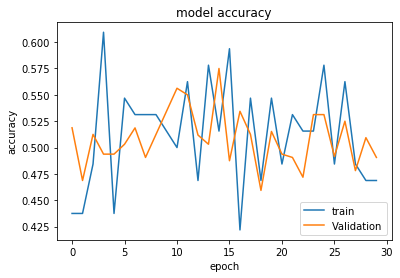

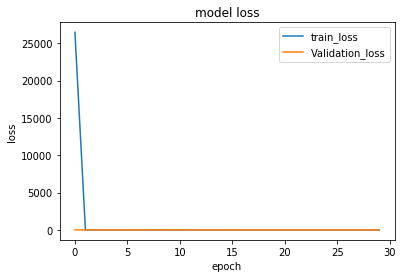

In [8]:
#Graph represenattaion of loss and accuracy
plt.figure()
plt.plot(hist.history["acc"])
plt.plot(hist.history["val_acc"])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Validation'], loc='lower right')
plt.figure()
print(f"Training maximum accuracy: {np.max(hist.history['acc']) * 100:.2f} %")
print(f"Validation maximum accuracy: {np.max(hist.history['val_acc']) * 100:.2f} %")
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'Validation_loss'], loc='upper right')

print(f"Training model minimum loss: {np.min(hist.history['loss'])}")
print(f"Validation model minimum loss : {np.min(hist.history['val_loss']) }")
